In [ ]:
i mport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature Names:", data.feature_names[:5], "...")
print("Target Names:", data.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Target Names: ['malignant' 'benign']
Shape of X: (569, 30)
Shape of y: (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 455
Testing samples: 114


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=1)

adaboost_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)


In [ ]:
adaboost_clf.fit(X_train, y_train)
print("Model training completed successfully.")


Model training completed successfully.


In [ ]:
# Predictions
y_pred = adaboost_clf.predict(X_test)
y_prob = adaboost_clf.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



--- Model Evaluation ---
Accuracy: 0.9561
Precision: 0.9467
Recall: 0.9861
F1-Score: 0.9660
ROC AUC: 0.9835

Confusion Matrix:
 [[38  4]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



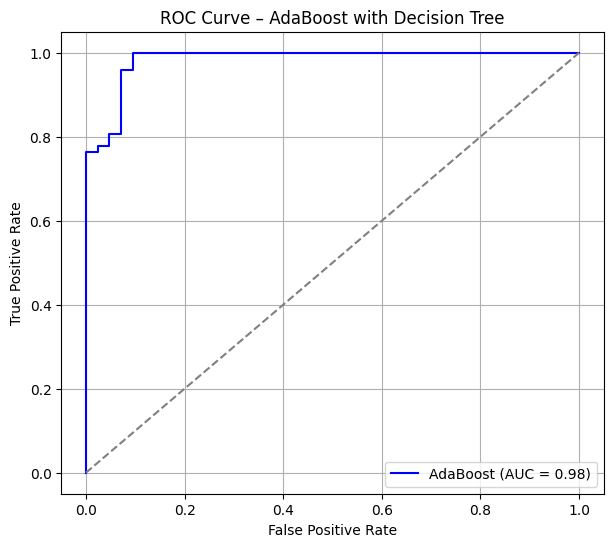

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', label=f"AdaBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve – AdaBoost with Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
